## 공공데이터를 이용한 카페 상권분석(2020 Ver.)


**들어가며**

- 공공데이터를 통해 대한민국의 카페 상권에 대해 이해해본다.
- 공공데이터포털(data.go.kr)에 다양한 데이터가 공개되어 있다.
- 그 중에 카페(라는 업종분류)들에 대해서 현황을 조사하려고 한다.

**명세사항**
1. 전국 카페 데이터를 모두 수집해야한다.
2. 지역별 or 브랜드별 점포 현황을 확인한다.
3. 분석 결과를 시각화한다. 



[데이터] https://www.data.go.kr/data/15012005/fileData.do

In [10]:
# 라이브러리를 불러온다.
import pandas as pd

## 1. 데이터 불러오기

In [11]:
# 다운로드 받은 데이터중 일부를 열어본다.
# sep : 데이터 구분자 기준
# 윈도우 사용자의 경우 encoding 설정해줘야함.
temp = pd.read_csv("../publicData/소상공인시장진흥공단_상가(상권)정보_서울_202012.csv", sep = '|', encoding = 'utf8')
temp

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1174010200102170000018014,고덕그라시움,서울특별시 강동구 고덕로 333,134082,5224.0,NaN,NaN,NaN,127.159471,37.556197
1,17120456,이때,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144012400103900067027687,NaN,서울특별시 마포구 동교로38안길 7,121867,3982.0,NaN,NaN,NaN,126.924660,37.562176
2,17175350,L.A.D,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144012000103950112010755,NaN,서울특별시 마포구 잔다리로3안길 23,121840,4043.0,NaN,NaN,NaN,126.919845,37.550689
3,17175311,제이씨에스푸드,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1162010200101180033018722,NaN,서울특별시 관악구 신림로14길 3,151856,8839.0,NaN,NaN,NaN,126.937790,37.471190
4,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346572,17222727,현대기림,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,...,1120011400102760017009013,NaN,서울특별시 성동구 뚝섬로 366-72,133819,4775.0,NaN,NaN,NaN,127.051154,37.539464
346573,17222723,본현대미아점,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,...,1129013400100200001025204,현대백화점미아점,서울특별시 성북구 동소문로 315,136719,2730.0,NaN,5,NaN,127.028726,37.608392
346574,17219564,오피스알파,약장수,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,...,1130510300100360037035171,NaN,서울특별시 강북구 노해로17길 62-1,142872,1075.0,NaN,NaN,101,127.018733,37.640485
346575,17219761,앤클라인뉴욕핸드백,NaN,D,소매,D06,가방/신발/액세서리,D06A10,가방/가죽제품소매,G47430,...,1153010200105730000020642,NC백화점,서울특별시 구로구 구로중앙로 152,152715,8292.0,NaN,1,NaN,126.882409,37.501378


In [19]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
from glob import glob

# csv 목록 불러오기
file_names = glob("../publicData/*.csv")
# file_names
total = pd.DataFrame()

# 모든 csv 병합하기
for file_name in file_names :
    temp = pd.read_csv(file_name, sep='|', encoding='utf8')
    total = pd.concat([total, temp])

# reset index
# inplace : 인덱스를 순서에 맞게 설정
# drop : 기존 인덱스 제거
total.reset_index(inplace=True)
total

C:\Users\yuji\anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,index,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,0,17175358,국수나루,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,4215010900101730002015569,NaN,강원도 강릉시 토성로 193,210934.0,25531.0,NaN,NaN,NaN,128.896783,37.757642
1,1,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
2,2,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
3,3,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051
4,4,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831.0,25633.0,NaN,NaN,NaN,129.052902,37.654680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416247,93094,17215242,해성국제결혼,NaN,F,생활서비스,F17,예식/의례/관혼상제,F17A05,결혼상담소,...,4311311100104460002018922,NaN,충청북도 청주시 서원구 1순환로 785,362747.0,28668.0,상가,NaN,201,127.464755,36.624187
2416248,93095,17221668,CU,청주우암공원점,D,소매,D03,종합소매점,D03A01,편의점,...,4311111300103410001046095,NaN,충청북도 청주시 청원구 향군로15번길 27,363814.0,28538.0,NaN,1,NaN,127.486439,36.647056
2416249,93096,17222225,슬기로운상회,NaN,D,소매,D03,종합소매점,D03A06,종합소매,...,4311111600104370000038563,사천동아아파트,충청북도 청주시 청원구 율봉로 31,363710.0,28341.0,104,NaN,203,127.473439,36.664050
2416250,93097,17222106,김씨상회,NaN,D,소매,D03,종합소매점,D03A06,종합소매,...,4311410300108540001000001,NaN,충청북도 청주시 청원구 충청대로139번길 39,363818.0,28326.0,NaN,1,102,127.492232,36.669295


In [20]:
# 분석에 필요한 column을 고른다.
data = total[['상호명', '지점명', '상권업종대분류명' , '상권업종중분류명', '시도명', '시군구명' , '행정동명']]
data

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,국수나루,NaN,음식,한식,강원도,강릉시,옥천동
1,동그라미중고타이어,NaN,소매,자동차/자동차용품,강원도,강릉시,포남1동
2,세인트존스호텔Ohcrab,NaN,숙박,호텔/콘도,강원도,강릉시,초당동
3,평창라마다호텔,NaN,숙박,호텔/콘도,강원도,평창군,대관령면
4,호텔탑스텐스카이라운지,NaN,숙박,호텔/콘도,강원도,강릉시,옥계면
...,...,...,...,...,...,...,...
2416247,해성국제결혼,NaN,생활서비스,예식/의례/관혼상제,충청북도,청주시 서원구,성화.개신.죽림동
2416248,CU,청주우암공원점,소매,종합소매점,충청북도,청주시 청원구,우암동
2416249,슬기로운상회,NaN,소매,종합소매점,충청북도,청주시 청원구,율량.사천동
2416250,김씨상회,NaN,소매,종합소매점,충청북도,청주시 청원구,율량.사천동


In [21]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416252 entries, 0 to 2416251
Data columns (total 40 columns):
 #   Column     Dtype  
---  ------     -----  
 0   index      int64  
 1   상가업소번호     int64  
 2   상호명        object 
 3   지점명        object 
 4   상권업종대분류코드  object 
 5   상권업종대분류명   object 
 6   상권업종중분류코드  object 
 7   상권업종중분류명   object 
 8   상권업종소분류코드  object 
 9   상권업종소분류명   object 
 10  표준산업분류코드   object 
 11  표준산업분류명    object 
 12  시도코드       int64  
 13  시도명        object 
 14  시군구코드      int64  
 15  시군구명       object 
 16  행정동코드      int64  
 17  행정동명       object 
 18  법정동코드      float64
 19  법정동명       object 
 20  지번코드       int64  
 21  대지구분코드     int64  
 22  대지구분명      object 
 23  지번본번지      int64  
 24  지번부번지      float64
 25  지번주소       object 
 26  도로명코드      int64  
 27  도로명        object 
 28  건물본번지      int64  
 29  건물부번지      float64
 30  건물관리번호     object 
 31  건물명        object 
 32  도로명주소      object 
 33  구우편번호      float64
 34  신우편번호      float64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416252 entries, 0 to 2416251
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   상호명       object
 1   지점명       object
 2   상권업종대분류명  object
 3   상권업종중분류명  object
 4   시도명       object
 5   시군구명      object
 6   행정동명      object
dtypes: object(7)
memory usage: 129.0+ MB


In [23]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거한다.
del total

In [24]:
# total이 삭제 됐는지 확인해보기
total.head()

NameError: name 'total' is not defined

## 2. 데이터 구경하기

#### 전국 커피 전문점 

In [26]:
# set(data['상권업종대분류명'])
set(data['상권업종중분류명']) # '커피점/카페'

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타교육기관',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산임대',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연구소',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '전시/관람',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '특수교육기관',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학교',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육'

In [30]:
# 카페만 뽑아낸다.
df_coffee = data[data['상권업종중분류명'] == '커피점/카페']

# index를 다시 세팅한다.
df_coffee.index = range(len(df_coffee))

print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee.head()

전국 커피 전문점 점포 수 :  113705


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,키즈까페아이사랑,NaN,음식,커피점/카페,강원도,강릉시,성덕동
1,카페마실,NaN,음식,커피점/카페,강원도,원주시,단계동
2,힐링,NaN,음식,커피점/카페,강원도,원주시,단구동
3,드롭탑,속초엑스포점,음식,커피점/카페,강원도,속초시,조양동
4,SHIMS,NaN,음식,커피점/카페,강원도,원주시,행구동


#### 서울내 커피 전문점 

In [31]:
set(data["시도명"])

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [32]:
# 카페 중에 "서울"에 위치하고 있는 점포만 뽑아낸다.
df_seoul_coffee = data[(data["상권업종중분류명"] == "커피점/카페") & (data["시도명"] == "서울특별시")]
df_seoul_coffee.index = range(len(df_seoul_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee.head()

서울시 내 커피 전문점 점포 수 : 22239


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동
2,406번째스토브,NaN,음식,커피점/카페,서울특별시,양천구,목1동
3,로얄커피숍,NaN,음식,커피점/카페,서울특별시,강동구,성내2동
4,빈트리망원점,망원점,음식,커피점/카페,서울특별시,마포구,망원1동


#### 전국 스타벅스

In [33]:
# 이번엔 전국에 있는 스타벅스를 뽑아낸다.
df_starbucks = df_coffee[df_coffee["상호명"].str.contains("스타벅스")]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks.head()

전국 스타벅스 점포 수 : 1613


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스,NaN,음식,커피점/카페,강원도,원주시,단계동
1,스타벅스강릉안목항점,강릉안목항점,음식,커피점/카페,강원도,강릉시,송정동
2,스타벅스,대명델피노리조트점,음식,커피점/카페,강원도,고성군,토성면
3,스타벅스춘천후평DT점,춘천후평DT점,음식,커피점/카페,강원도,춘천시,후평3동
4,스타벅스,춘천명동점,음식,커피점/카페,강원도,춘천시,약사명동


#### 서울 스타벅스

In [34]:
# 이번엔 서울에 있는 스타벅스를 뽑아낸다.
df_seoul_starbucks = df_starbucks[df_starbucks["시도명"] == "서울특별시"]
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks.head()

서울시 내 스타벅스 점포 수 : 509


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스,대학로점,음식,커피점/카페,서울특별시,종로구,이화동
1,스타벅스,한티점,음식,커피점/카페,서울특별시,강남구,대치4동
2,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동
3,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,서울특별시,서초구,서초3동
4,스타벅스,가로수길점,음식,커피점/카페,서울특별시,강남구,신사동


#### 전국 이디야

In [36]:
# 이번엔 전국에 있는 이디야를 뽑아낸다.
df_ediya = df_coffee[df_coffee["상호명"].str.contains("이디야")]
df_ediya.index = range(len(df_ediya))
print('전국 이디야 점포 수 :', len(df_ediya))
df_ediya.head()

전국 이디야 점포 수 : 2238


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,이디야커피,원주반곡동점,음식,커피점/카페,강원도,원주시,반곡관설동
1,이디야커피,춘천제일점,음식,커피점/카페,강원도,춘천시,강남동
2,이디야커피,흥업점,음식,커피점/카페,강원도,원주시,흥업면
3,이디야커피,정동진역점,음식,커피점/카페,강원도,강릉시,강동면
4,이디야커피,속초동명항점,음식,커피점/카페,강원도,속초시,동명동


#### 서울 이디야

In [37]:
# 이번엔 서울에 있는 이디야를 뽑아낸다.
df_seoul_ediya = df_ediya[df_ediya["시도명"] == "서울특별시"]
df_seoul_ediya.index = range(len(df_seoul_ediya))
print('서울시 내 이디야 점포 수 :', len(df_seoul_ediya))
df_seoul_ediya.head()

서울시 내 이디야 점포 수 : 474


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,이디야커피,신길역점,음식,커피점/카페,서울특별시,영등포구,신길1동
1,이디야커피,북창동점,음식,커피점/카페,서울특별시,중구,소공동
2,이디야커피,라이프점,음식,커피점/카페,서울특별시,영등포구,여의동
3,이디야커피,시흥점,음식,커피점/카페,서울특별시,금천구,시흥2동
4,이디야커피양재AT점,양재AT점,음식,커피점/카페,서울특별시,서초구,양재2동


#### 전국 커피빈 

In [38]:
# 이번엔 전국에 있는 커피빈을 뽑아낸다.
df_coffeebean = df_coffee[df_coffee["상호명"].str.contains("커피빈")]
df_coffeebean.index = range(len(df_coffeebean))
print('전국 커피빈 점포 수 :', len(df_coffeebean))
df_coffeebean.head()

전국 커피빈 점포 수 : 324


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,NaN,음식,커피점/카페,강원도,동해시,묵호동
1,커피빈,코리아원주AK플라자점,음식,커피점/카페,강원도,원주시,단계동
2,커피빈,현대프리미엄아울렛김포점,음식,커피점/카페,경기도,김포시,고촌읍
3,커피빈,중동현대백화점U-PLEX점,음식,커피점/카페,경기도,부천시,중1동
4,커피빈,코리아중동위브더스테이트점,음식,커피점/카페,경기도,부천시,중2동


#### 서울 커피빈 

In [39]:
# 이번엔 서울에 있는 커피빈을 뽑아낸다.
df_seoul_coffeebean = df_coffeebean[df_coffeebean["시도명"] == "서울특별시"]
df_seoul_coffeebean.index = range(len(df_seoul_coffeebean))
print('서울시 내 커피빈 점포 수 :', len(df_seoul_coffeebean))
df_seoul_coffeebean.head()

서울시 내 커피빈 점포 수 : 191


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,커피빈,코리아선릉역점,음식,커피점/카페,서울특별시,강남구,역삼1동
2,커피빈코리아낙성대역점,코리아낙성대역점,음식,커피점/카페,서울특별시,관악구,행운동
3,커피빈,코리아청담에스점,음식,커피점/카페,서울특별시,강남구,청담동
4,커피빈,코리아청담성당점,음식,커피점/카페,서울특별시,강남구,청담동


#### 전국 투썸 

In [40]:
# 이번엔 전국에 있는 투썸을 뽑아낸다.
df_2some = df_coffee[df_coffee["상호명"].str.contains("투썸")]
df_2some.index = range(len(df_2some))
print('전국 투썸 점포 수 :', len(df_2some))
df_2some.head()

전국 투썸 점포 수 : 1141


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,춘천명동점,음식,커피점/카페,강원도,춘천시,조운동
1,투썸플레이스,강릉포남점,음식,커피점/카페,강원도,강릉시,포남1동
2,투썸플레이스,춘천퇴계점,음식,커피점/카페,강원도,춘천시,퇴계동
3,투썸플레이스,소양강댐점,음식,커피점/카페,강원도,춘천시,신북읍
4,투썸플레이스,용평리조트점,음식,커피점/카페,강원도,평창군,대관령면


#### 서울 투썸 

In [41]:
# 이번엔 서울에 있는 투썸을 뽑아낸다.
df_seoul_2some = df_2some[df_2some["시도명"] == "서울특별시"]
df_seoul_2some.index = range(len(df_seoul_2some))
print('서울시 내 투썸 점포 수 :', len(df_seoul_2some))
df_seoul_2some.head()

서울시 내 투썸 점포 수 : 286


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,서울타워점,음식,커피점/카페,서울특별시,용산구,용산2가동
1,투썸플레이스서울대역중앙점,서울대역중앙점,음식,커피점/카페,서울특별시,관악구,중앙동
2,투썸플레이스,씨제이프레시웨이강남세브란스병원점,음식,커피점/카페,서울특별시,강남구,도곡1동
3,투썸플레이스,LG광화문빌딩점,음식,커피점/카페,서울특별시,종로구,사직동
4,투썸플레이스,가락시장역점,음식,커피점/카페,서울특별시,송파구,가락본동


#### 전국 빽다방 

In [42]:
# 이번엔 전국에 있는 빽다방를 뽑아낸다.
df_bbaek = df_coffee[df_coffee["상호명"].str.contains("빽다방")]
df_bbaek.index = range(len(df_bbaek))
print('전국 빽다방 점포 수 :', len(df_bbaek))
df_bbaek.head()

전국 빽다방 점포 수 : 567


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,빽다방,춘천명동씨지브이점,음식,커피점/카페,강원도,춘천시,조운동
1,빽다방,춘천석사CGV점,음식,커피점/카페,강원도,춘천시,석사동
2,빽다방동해천곡점,동해천곡점,음식,커피점/카페,강원도,동해시,천곡동
3,빽다방,원주중앙1호점,음식,커피점/카페,강원도,원주시,일산동
4,빽다방,삼척대학로점,음식,커피점/카페,강원도,삼척시,성내동


#### 서울 빽다방 

In [43]:
# 이번엔 서울에 있는 빽다방를 뽑아낸다.
df_seoul_bbaek = df_bbaek[df_bbaek["시도명"] == "서울특별시"]
df_seoul_bbaek.index = range(len(df_seoul_bbaek))
print('서울시 내 빽다방 점포 수 :', len(df_seoul_bbaek))
df_seoul_bbaek.head()

서울시 내 빽다방 점포 수 : 129


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,더본코리아_빽다방등촌,성당점,음식,커피점/카페,서울특별시,강서구,등촌3동
1,스시마이우강남역빽다방,NaN,음식,커피점/카페,서울특별시,서초구,서초4동
2,빽다방공덕새창로점,공덕새창로점,음식,커피점/카페,서울특별시,마포구,도화동
3,빽다방서초우성점,서초우성점,음식,커피점/카페,서울특별시,서초구,서초2동
4,빽다방잠실장미상가,NaN,음식,커피점/카페,서울특별시,송파구,잠실6동


#### 전국 할리스 

In [44]:
# 이번엔 전국에 있는 할리스를 뽑아낸다.
df_hollys = df_coffee[df_coffee["상호명"].str.contains("할리스")]
df_hollys.index = range(len(df_hollys))
print('전국 할리스 점포 수 :', len(df_hollys))
df_hollys.head()

전국 할리스 점포 수 : 707


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,할리스커피전문점,NaN,음식,커피점/카페,강원도,강릉시,중앙동
1,할리스커피,원주점,음식,커피점/카페,강원도,원주시,단구동
2,할리스,에프엔비원주점,음식,커피점/카페,강원도,원주시,단구동
3,할리스커피,중앙점,음식,커피점/카페,강원도,원주시,중앙동
4,할리스커피동해묵호점,동해묵호점,음식,커피점/카페,강원도,동해시,천곡동


#### 서울 할리스 

In [45]:
# 이번엔 서울에 있는 할리스를 뽑아낸다.
df_seoul_hollys = df_hollys[df_hollys["시도명"] == "서울특별시"]
df_seoul_hollys.index = range(len(df_seoul_hollys))
print('서울시 내 할리스 점포 수 :', len(df_seoul_hollys))
df_seoul_hollys.head()

서울시 내 할리스 점포 수 : 200


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,할리스커피남부터미널,NaN,음식,커피점/카페,서울특별시,서초구,서초1동
1,할리스,백석예술대점,음식,커피점/카페,서울특별시,서초구,방배3동
2,할리스,국기원점,음식,커피점/카페,서울특별시,강남구,역삼1동
3,할리스커피KBS본관점,KBS본관점,음식,커피점/카페,서울특별시,영등포구,여의동
4,할리스커피,선릉점,음식,커피점/카페,서울특별시,강남구,대치4동


#### 전국 메가커피

In [46]:
# 이번엔 전국에 있는 메가커피를 뽑아낸다.
df_mega = df_coffee[df_coffee["상호명"].str.contains("메가커피")]
df_mega.index = range(len(df_mega))
print('전국 메가커피 점포 수 :', len(df_mega))
df_mega.head()

전국 메가커피 점포 수 : 481


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,메가커피인제점,인제점,음식,커피점/카페,강원도,인제군,인제읍
1,메가커피,NaN,음식,커피점/카페,강원도,춘천시,후평3동
2,메가커피,와수리점,음식,커피점/카페,강원도,철원군,서면
3,메가커피,화천사창리점,음식,커피점/카페,강원도,화천군,사내면
4,메가커피철원문혜리점,철원문혜리점,음식,커피점/카페,강원도,철원군,갈말읍


#### 서울 메가커피 

In [47]:
# 이번엔 서울에 있는 메가커피를 뽑아낸다.
df_seoul_mega = df_mega[df_mega["시도명"] == "서울특별시"]
df_seoul_mega.index = range(len(df_seoul_mega))
print('서울시 내 메가커피 점포 수 :', len(df_seoul_mega))
df_seoul_mega.head()

서울시 내 메가커피 점포 수 : 86


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,메가커피미아,수유시장점,음식,커피점/카페,서울특별시,강북구,미아동
1,메가커피,홍대점,음식,커피점/카페,서울특별시,마포구,서교동
2,메가커피,NaN,음식,커피점/카페,서울특별시,동대문구,용신동
3,메가커피,NaN,음식,커피점/카페,서울특별시,금천구,가산동
4,메가커피,숙대입구역점,음식,커피점/카페,서울특별시,용산구,남영동


## 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**2020년 12월 기준 커피전문점 평판 순위**


(source : https://www.futurekorea.co.kr/news/articleView.html?idxno=125637)

1. 스타벅스
2. 투썸플레이스
3. 이디야
4. 메가커피
5. 커피빈

**변수**

- 전체 점포 : data
- 전체/서울 커피전문점 : df_coffee / df_seoul_coffee



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 커피빈 : df_coffeebean / df_seoul_coffeebean
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek
- 전체/서울 할리스 : df_hollys / df_seoul_hollys
- 전체/서울 메가커피 : df_mega / df_seoul_mega

### 1) 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [88]:
print("**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****")
print("주요 5대 커피브랜드 전국 입점 비율 : %.3f%%"
      % ((len(df_starbucks) + len(df_2some) + len(df_ediya) + len(df_mega) + len(df_coffeebean))
         / len(df_coffee) * 100 ))
print("1. 스타벅스 : %.3f%%" % (len(df_starbucks) / len(df_coffee) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_2some) / len(df_coffee) * 100))
print("3. 이디야 : %.3f%%" % (len(df_ediya) / len(df_coffee) * 100))
print("4. 메가커피 : %.3f%%" % (len(df_mega) / len(df_coffee) * 100))
print("5. 커피빈 : %.3f%%" % (len(df_coffeebean) / len(df_coffee) * 100))

**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****
주요 5대 커피브랜드 전국 입점 비율 : 5.098%
1. 스타벅스 : 1.419%
2. 투썸플레이스 : 1.003%
3. 이디야 : 1.968%
4. 메가커피 : 0.423%
5. 커피빈 : 0.285%


### 2) 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [89]:
print("스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_seoul_coffee) * 100))
print("커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_seoul_coffee) * 100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_seoul_coffee) * 100))
print("빽다방 : %.3f%%" % (len(df_seoul_bbaek) / len(df_seoul_coffee) * 100))
print("할리스 : %.3f%%" % (len(df_seoul_hollys) / len(df_seoul_coffee) * 100))
print("메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_seoul_coffee) * 100))

스타벅스 : 2.289%
이디야 : 2.131%
커피빈 : 0.859%
투썸플레이스 : 1.286%
빽다방 : 0.580%
할리스 : 0.899%
메가커피 : 0.387%


### 3) 각 커피브랜드별 서울 입점 비율 

In [90]:
print("**** 주요 5대 커피브랜드별 서울 입점 비율 ****")
print("1. 스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_starbucks) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_2some) * 100))
print("3. 이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_ediya) * 100))
print("4. 메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_mega) * 100))
print("5. 커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_coffeebean) * 100))

**** 주요 5대 커피브랜드별 서울 입점 비율 ****
1. 스타벅스 : 31.556%
2. 투썸플레이스 : 25.066%
3. 이디야 : 21.180%
4. 메가커피 : 17.879%
5. 커피빈 : 58.951%


In [91]:
# 각 구별로 스타벅스가 얼마나 있는지 확인합니다.
starbucks_gu = df_seoul_starbucks.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
starbucks_gu = starbucks_gu.reset_index()
starbucks_gu = starbucks_gu.set_index('시군구명')
starbucks_gu

,상호명
시군구명,
강남구,87
중구,48
서초구,44
송파구,33
종로구,31
마포구,28
영등포구,26
용산구,21
서대문구,21


In [95]:
# 시각화를 위한 라이브러리를 불러온다.
import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline

In [96]:
#### Windows10 사용자는 아래 코드가 필요없음!

# macos에서 사용가능한 한글 글꼴 확인 코드
[f.name for f in font_manager.fontManager.ttflist if 'Neo' in f.name]

[]

In [97]:
## 운영체제별 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'Apple SD Gothic Neo'
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

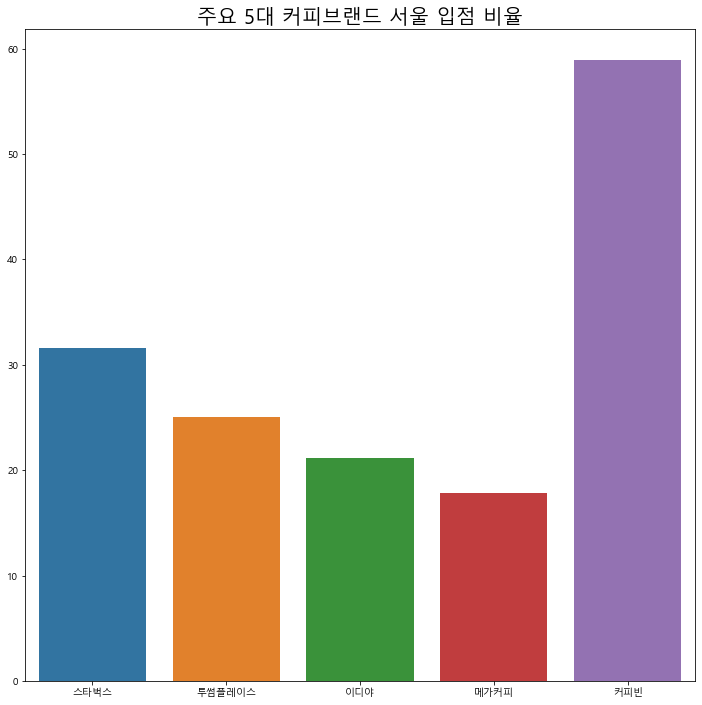

In [98]:
# 주요 5대 커피브랜드 서울 입점 비율을 시각화.

starbucks_rate = (len(df_seoul_starbucks) / len(df_starbucks) * 100)
twosome_rate = (len(df_seoul_2some) / len(df_2some) * 100)
ediya_rate = (len(df_seoul_ediya) / len(df_ediya) * 100)
mega_rate = (len(df_seoul_mega) / len(df_mega) * 100)
coffeebean_rate =  (len(df_seoul_coffeebean) / len(df_coffeebean) * 100)

x = ["스타벅스", "투썸플레이스", "이디야", "메가커피", "커피빈"]
y = [starbucks_rate, twosome_rate, ediya_rate, mega_rate, coffeebean_rate]

plt.figure(figsize=(12, 12))
plt.title("주요 5대 커피브랜드 서울 입점 비율", fontdict={"fontsize" : 20})
sns.barplot(x=x, y=y)
plt.show()
